# Machine Learning Project - Rainfall prediction

## 1. Exploration the data

As usual, we load some important and useful libraries for data loading and data visualization

In [55]:
library(ggplot2)
library(tidyr)
library(gridExtra)

We load the dataset as a dataframe

In [56]:
rain = read.delim("rain_project.txt", sep = " ")

In [57]:
summary(rain)

      Id                date                 ff               t        
 Length:688         Length:688         Min.   : 1.158   Min.   :269.5  
 Class :character   Class :character   1st Qu.: 2.870   1st Qu.:279.9  
 Mode  :character   Mode  :character   Median : 3.859   Median :283.2  
                                       Mean   : 4.082   Mean   :283.7  
                                       3rd Qu.: 4.970   3rd Qu.:287.6  
                                       Max.   :12.500   Max.   :299.5  
       td              hu               dd             precip      
 Min.   :267.1   Min.   : 46.75   Min.   : 32.92   Min.   : 0.000  
 1st Qu.:277.6   1st Qu.: 80.53   1st Qu.:158.74   1st Qu.: 0.000  
 Median :281.2   Median : 86.40   Median :222.81   Median : 0.400  
 Mean   :281.1   Mean   : 85.56   Mean   :206.58   Mean   : 2.384  
 3rd Qu.:284.7   3rd Qu.: 92.06   3rd Qu.:260.68   3rd Qu.: 2.600  
 Max.   :291.1   Max.   :100.00   Max.   :343.04   Max.   :34.500  
    ws_arome        

In [58]:
head(rain)

,Id,date,ff,t,td,hu,dd,precip,ws_arome,p3031_arome,u10_arome,v10_arome,t2m_arome,d2m_arome,r_arome,tp_arome,msl_arome,rain,rain_class
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,22092001_527,2017-06-11,3.945000,289.4087,285.2771,78.78333,246.7500,0.0,3.663785,244.2995,3.0385028,1.4163599,289.2323,285.1709,79.03778,2.3282769,101672.9,0.2,low_rain
2,22092001_65,2016-03-06,3.739583,276.3758,273.4225,81.70000,260.3333,1.2,3.328476,305.6608,2.4638858,-1.8989708,275.8087,273.6726,86.33160,10.6754407,100583.8,4.2,high_rain
3,22092001_210,2016-07-29,3.273750,288.8692,286.7233,87.62083,259.0417,0.2,3.232380,256.0424,2.9638715,0.9856267,289.6274,286.4851,82.30103,4.5823092,101483.0,0.0,no_rain
4,22092001_136,2016-05-16,1.745000,284.2887,280.2158,76.58750,216.5417,0.0,1.720926,139.2973,-0.2606926,-1.3976028,284.7261,280.3673,75.38412,0.9402537,102223.6,0.0,no_rain
5,22092001_33,2016-02-03,5.718750,277.5279,274.5292,81.39167,285.5417,1.6,4.424012,285.5788,3.9400556,-1.4576058,277.7517,274.5907,80.43509,13.9030762,102416.2,0.0,no_rain
6,22092001_363,2016-12-29,1.750000,277.3533,275.1396,86.20417,140.8750,0.2,1.780965,157.8312,0.1446032,0.6620992,275.2941,273.0910,85.25869,0.2059833,103463.9,0.2,low_rain


## Elementary Explorations

In [59]:
var_names = names(rain)

In [51]:
# Quantitative variables
num_var = var_names[-c(1,2,19)]

# Qualitative variables
qual_var = var_names[c(1,2,19)]

### Deal with **qualitative variables**

In [60]:
for (var in qual_var)
{
    rain[, var] <- as.factor(rain[, var])
}
# rain[, "Id"] <- as.factor(rain[, "Id"])
# rain[, "date"] <- as.factor(rain[, "date"])
# rain[, "rain_class"] <- as.factor(rain[, "rain_class"])

In [62]:
as.factor(rain[, "rain_class"])

[1] low_rain  high_rain no_rain   no_rain   no_rain   low_rain  no_rain  
  [8] high_rain low_rain  low_rain  low_rain  low_rain  high_rain low_rain 
 [15] low_rain  low_rain  low_rain  high_rain low_rain  high_rain no_rain  
 [22] low_rain  high_rain low_rain  low_rain  high_rain low_rain  high_rain
 [29] high_rain high_rain high_rain low_rain  low_rain  high_rain low_rain 
 [36] low_rain  low_rain  high_rain no_rain   no_rain   no_rain   no_rain  
 [43] no_rain   no_rain   no_rain   high_rain low_rain  low_rain  low_rain 
 [50] low_rain  high_rain no_rain   low_rain  low_rain  low_rain  low_rain 
 [57] low_rain  high_rain low_rain  no_rain   low_rain  low_rain  low_rain 
 [64] no_rain   no_rain   high_rain high_rain low_rain  low_rain  high_rain
 [71] low_rain  high_rain low_rain  no_rain   low_rain  low_rain  low_rain 
 [78] low_rain  low_rain  low_rain  high_rain low_rain  no_rain   no_rain  
 [85] high_rain low_rain  low_rain  low_rain  no_rain   low_rain  low_rain 
 [92] low_rain  high_rain high_rain no_rain   low_rain  low_rain  no_rain  
 [99] no_rain   no_rain   high_rain low_rain  high_rain high_rain low_rain 
[106] low_rain  low_rain  high_rain no_rain   no_rain   high_rain high_rain
[113] low_rain  high_rain low_rain  low_rain  no_rain   no_rain   no_rain  
[120] no_rain   high_rain no_rain   high_rain high_rain no_rain   low_rain 
[127] low_rain  low_rain  no_rain   high_rain no_rain   high_rain no_rain  
[134] low_rain  low_rain  high_rain no_rain   high_rain no_rain   no_rain  
[141] no_rain   low_rain  low_rain  low_rain  low_rain  high_rain low_rain 
[148] no_rain   high_rain low_rain  no_rain   low_rain  low_rain  high_rain
[155] low_rain  high_rain no_rain   low_rain  low_rain  high_rain no_rain  
[162] no_rain   high_rain low_rain  low_rain  high_rain high_rain no_rain  
[169] low_rain  low_rain  no_rain   high_rain low_rain  no_rain   low_rain 
[176] high_rain low_rain  high_rain no_rain   low_rain  high_rain low_rain 
[183] no_rain   low_rain  high_rain no_rain   low_rain  no_rain   high_rain
[190] low_rain  no_rain   low_rain  high_rain high_rain low_rain  low_rain 
[197] high_rain high_rain low_rain  high_rain high_rain high_rain no_rain  
[204] no_rain   low_rain  no_rain   high_rain low_rain  low_rain  low_rain 
[211] low_rain  no_rain   low_rain  no_rain   no_rain   no_rain   low_rain 
[218] no_rain   low_rain  low_rain  no_rain   no_rain   high_rain low_rain 
[225] high_rain low_rain  no_rain   no_rain   low_rain  no_rain   low_rain 
[232] no_rain   high_rain no_rain   no_rain   low_rain  no_rain   high_rain
[239] high_rain high_rain high_rain low_rain  high_rain low_rain  no_rain  
[246] high_rain low_rain  low_rain  low_rain  low_rain  low_rain  no_rain  
[253] high_rain high_rain no_rain   low_rain  no_rain   low_rain  high_rain
[260] no_rain   low_rain  no_rain   low_rain  no_rain   high_rain no_rain  
[267] low_rain  no_rain   high_rain no_rain   no_rain   no_rain   no_rain  
[274] low_rain  low_rain  no_rain   high_rain low_rain  low_rain  no_rain  
[281] low_rain  low_rain  no_rain   no_rain   high_rain low_rain  low_rain 
[288] high_rain low_rain  high_rain low_rain  low_rain  low_rain  high_rain
[295] high_rain no_rain   high_rain no_rain   high_rain low_rain  low_rain 
[302] high_rain low_rain  low_rain  no_rain   low_rain  high_rain low_rain 
[309] no_rain   low_rain  low_rain  low_rain  high_rain low_rain  high_rain
[316] high_rain low_rain  low_rain  no_rain   low_rain  high_rain high_rain
[323] high_rain high_rain low_rain  no_rain   no_rain   low_rain  low_rain 
[330] low_rain  low_rain  low_rain  no_rain   no_rain   low_rain  high_rain
[337] low_rain  low_rain  no_rain   high_rain low_rain  no_rain   high_rain
[344] high_rain low_rain  low_rain  no_rain   no_rain   high_rain high_rain
[351] no_rain   low_rain  no_rain   no_rain   no_rain   low_rain  low_rain 
[358] low_rain  no_rain   low_rain  no_rain   low_rain  no_rain   low_rain 
[365] low_rain  low_rain  high_rain low_rain  no_r

### Histogram to see the distributions of variables

We plot as below the histograms of all quantitative variables to have an insight of the distributions of these variables

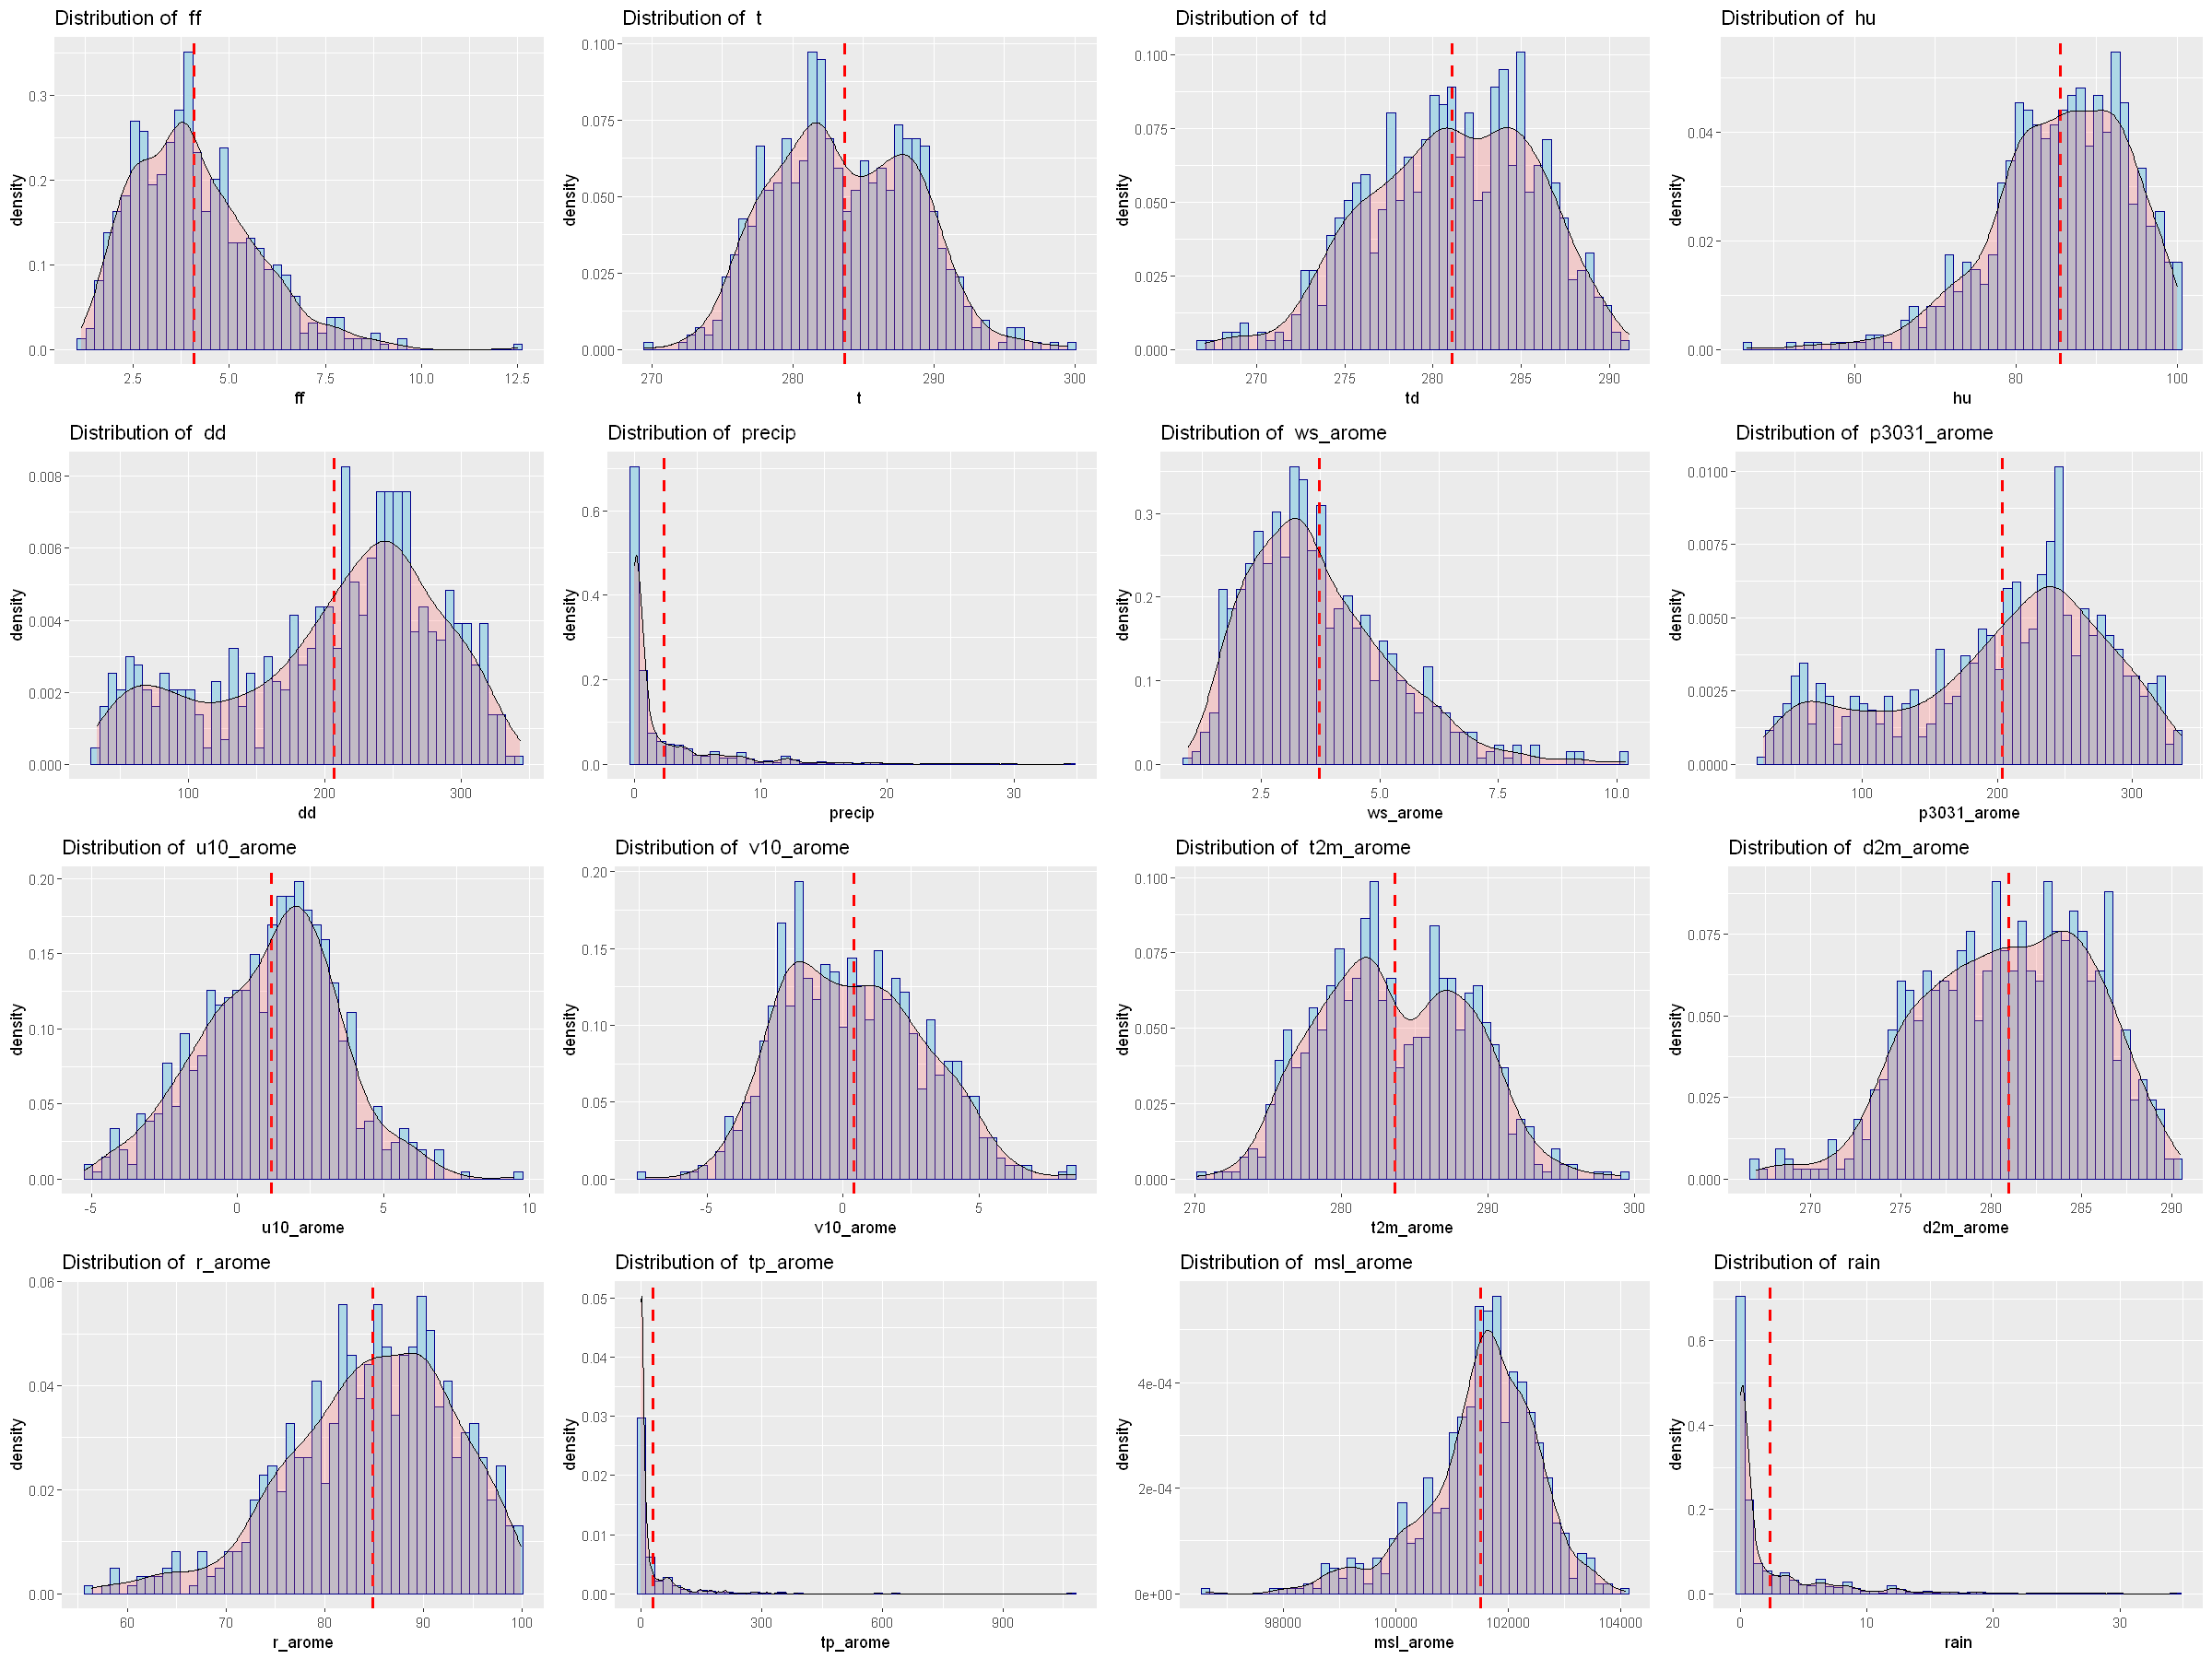

In [52]:
# Use lapply 

my_plots_list <- lapply(num_var, function(each_variable) {
  mean_val = mean(rain[, each_variable])[[1]]
  ggplot(data = rain, aes_string(x = each_variable)) + # Create a graphic object by ggplot  
    geom_histogram(aes(y = ..density..), bins = 50, color = "darkblue", fill="lightblue") +  # Add histogram 
    geom_vline(aes(xintercept = mean_val), color="red", linetype="dashed", size=1) +  # Add the mean (vertical line)
    geom_density(alpha=.25, fill="#FF6666") +   # Add the density approximation
    ggtitle(paste("Distribution of ",each_variable))
})

options(repr.plot.width = 20, repr.plot.height = 15)
gridExtra::grid.arrange(grobs = my_plots_list, ncol = 4)

From these histograms, we can remark that the distribution of some variables are not summetric. So we propose here some elementary transformations to make some distributions more symmetric and more "gaussian" 

In [10]:
rain[, 'ff'] = sqrt(rain[, 'ff'])


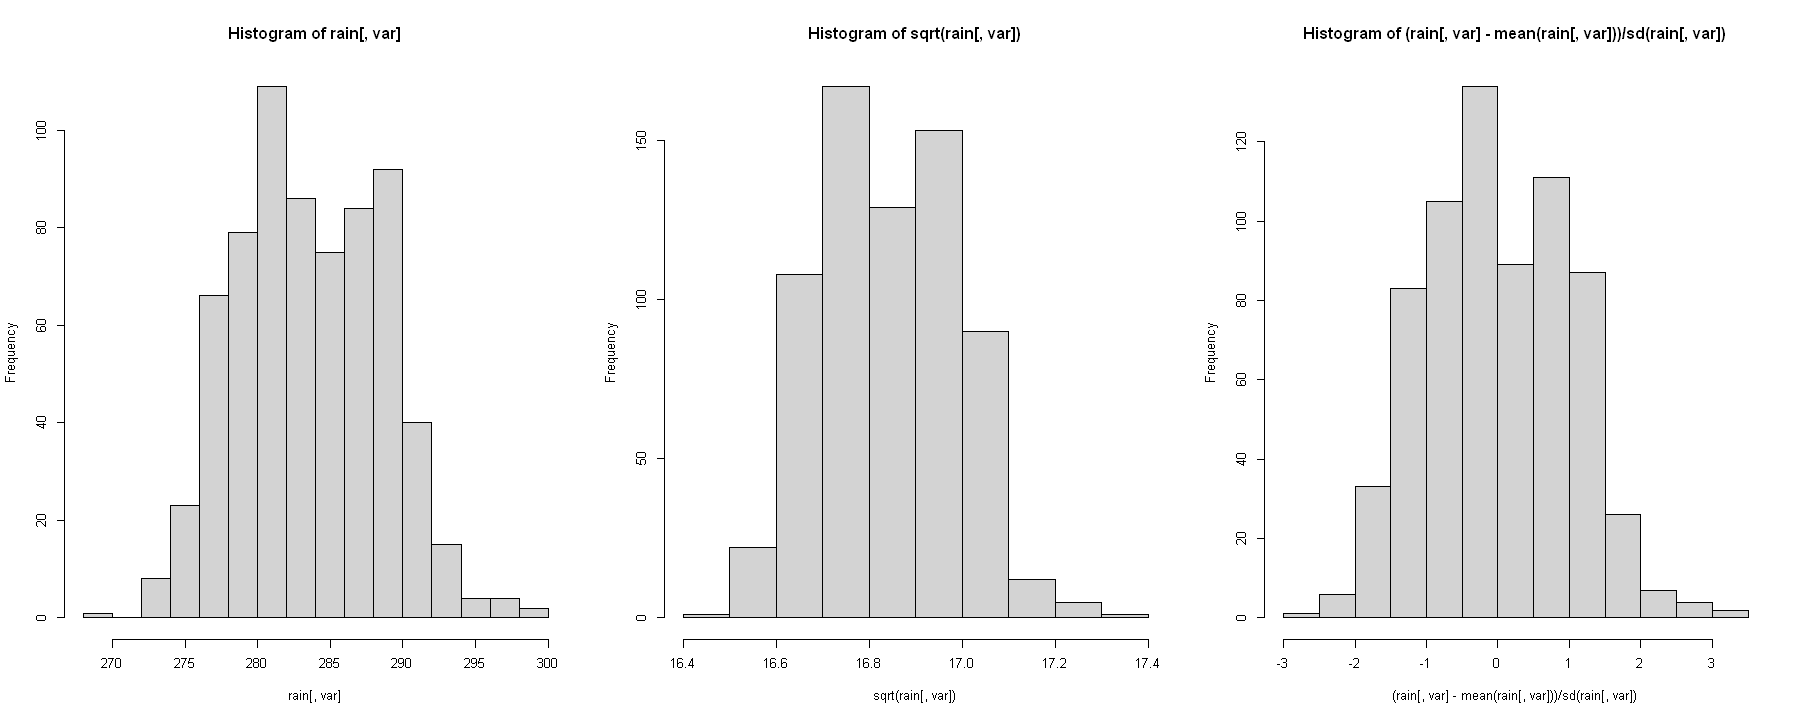

In [11]:
par(mfrow = c(1, 3))
options(repr.plot.width = 15, repr.plot.height = 6)
var = 't'
hist(rain[,var])
hist(sqrt(rain[,var]))
hist((rain[,var] - mean(rain[,var]))/sd(rain[,var]))

In [12]:
rain[, "precip_log"] <- log(log(rain[, "precip"]))
rain[, "tp_arome_log"] <- log(rain[, "tp_arome"])


Warning message in log(log(rain[, "precip"])):
"NaNs produced"


Moreover, we can see that the data are in different range, for example, ... So we need to normalize the data

### Data normalization

We will normalize the data to have zero mean and unit standard deviation for each varariable

In [13]:
rain_scaled = rain
rain_scaled[num_var] = scale(rain_scaled[num_var], center = TRUE, scale = TRUE)   

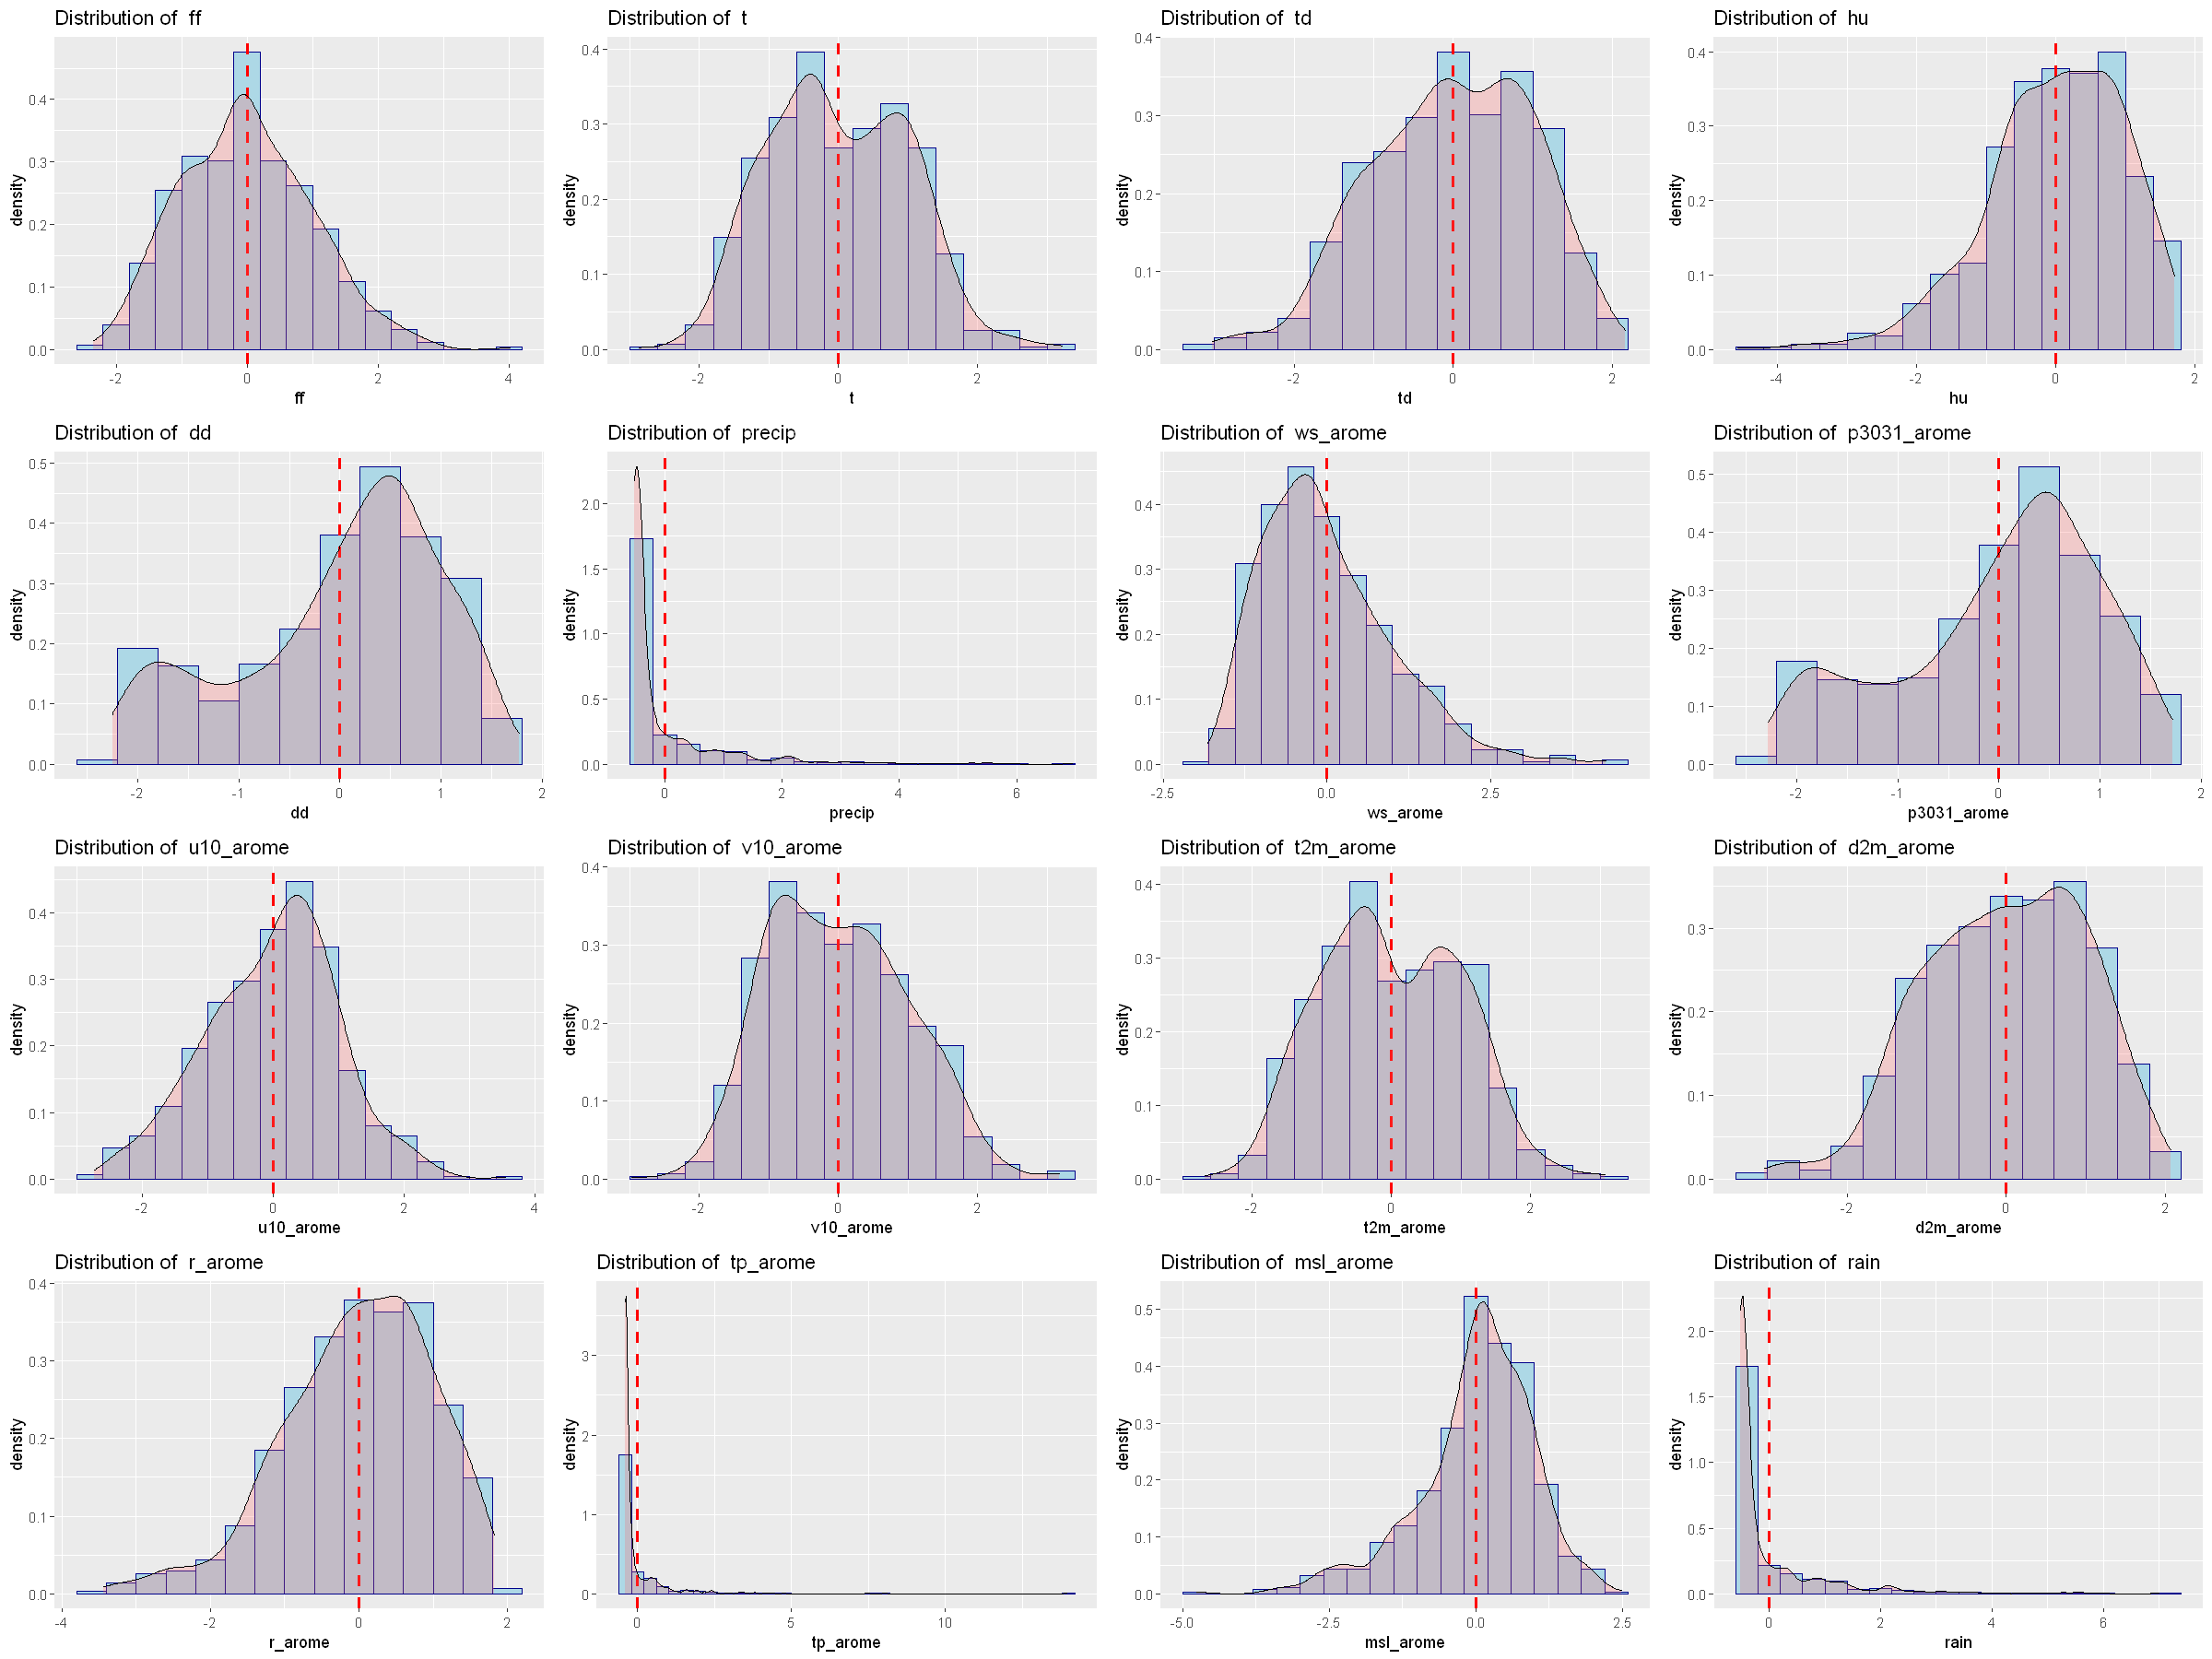

In [14]:
hist_list_scaled <- lapply(num_var, function(each_variable) {
  mean_val = mean(rain_scaled[, each_variable])[[1]]
  ggplot(data = rain_scaled, aes_string(x = each_variable)) + # Create a graphic object by ggplot  
    geom_histogram(aes(y = ..density..), binwidth = 0.4, color = "darkblue", fill="lightblue") +  # Add histogram 
    geom_vline(aes(xintercept = mean_val), color="red", linetype="dashed", size=1) +  # Add the mean (vertical line)
    geom_density(alpha=.25, fill="#FF6666") +   # Add the density approximation
    ggtitle(paste("Distribution of ",each_variable))
})

options(repr.plot.width = 20, repr.plot.height = 15)
gridExtra::grid.arrange(grobs = hist_list_scaled, ncol = 4)

### Deal with outliers

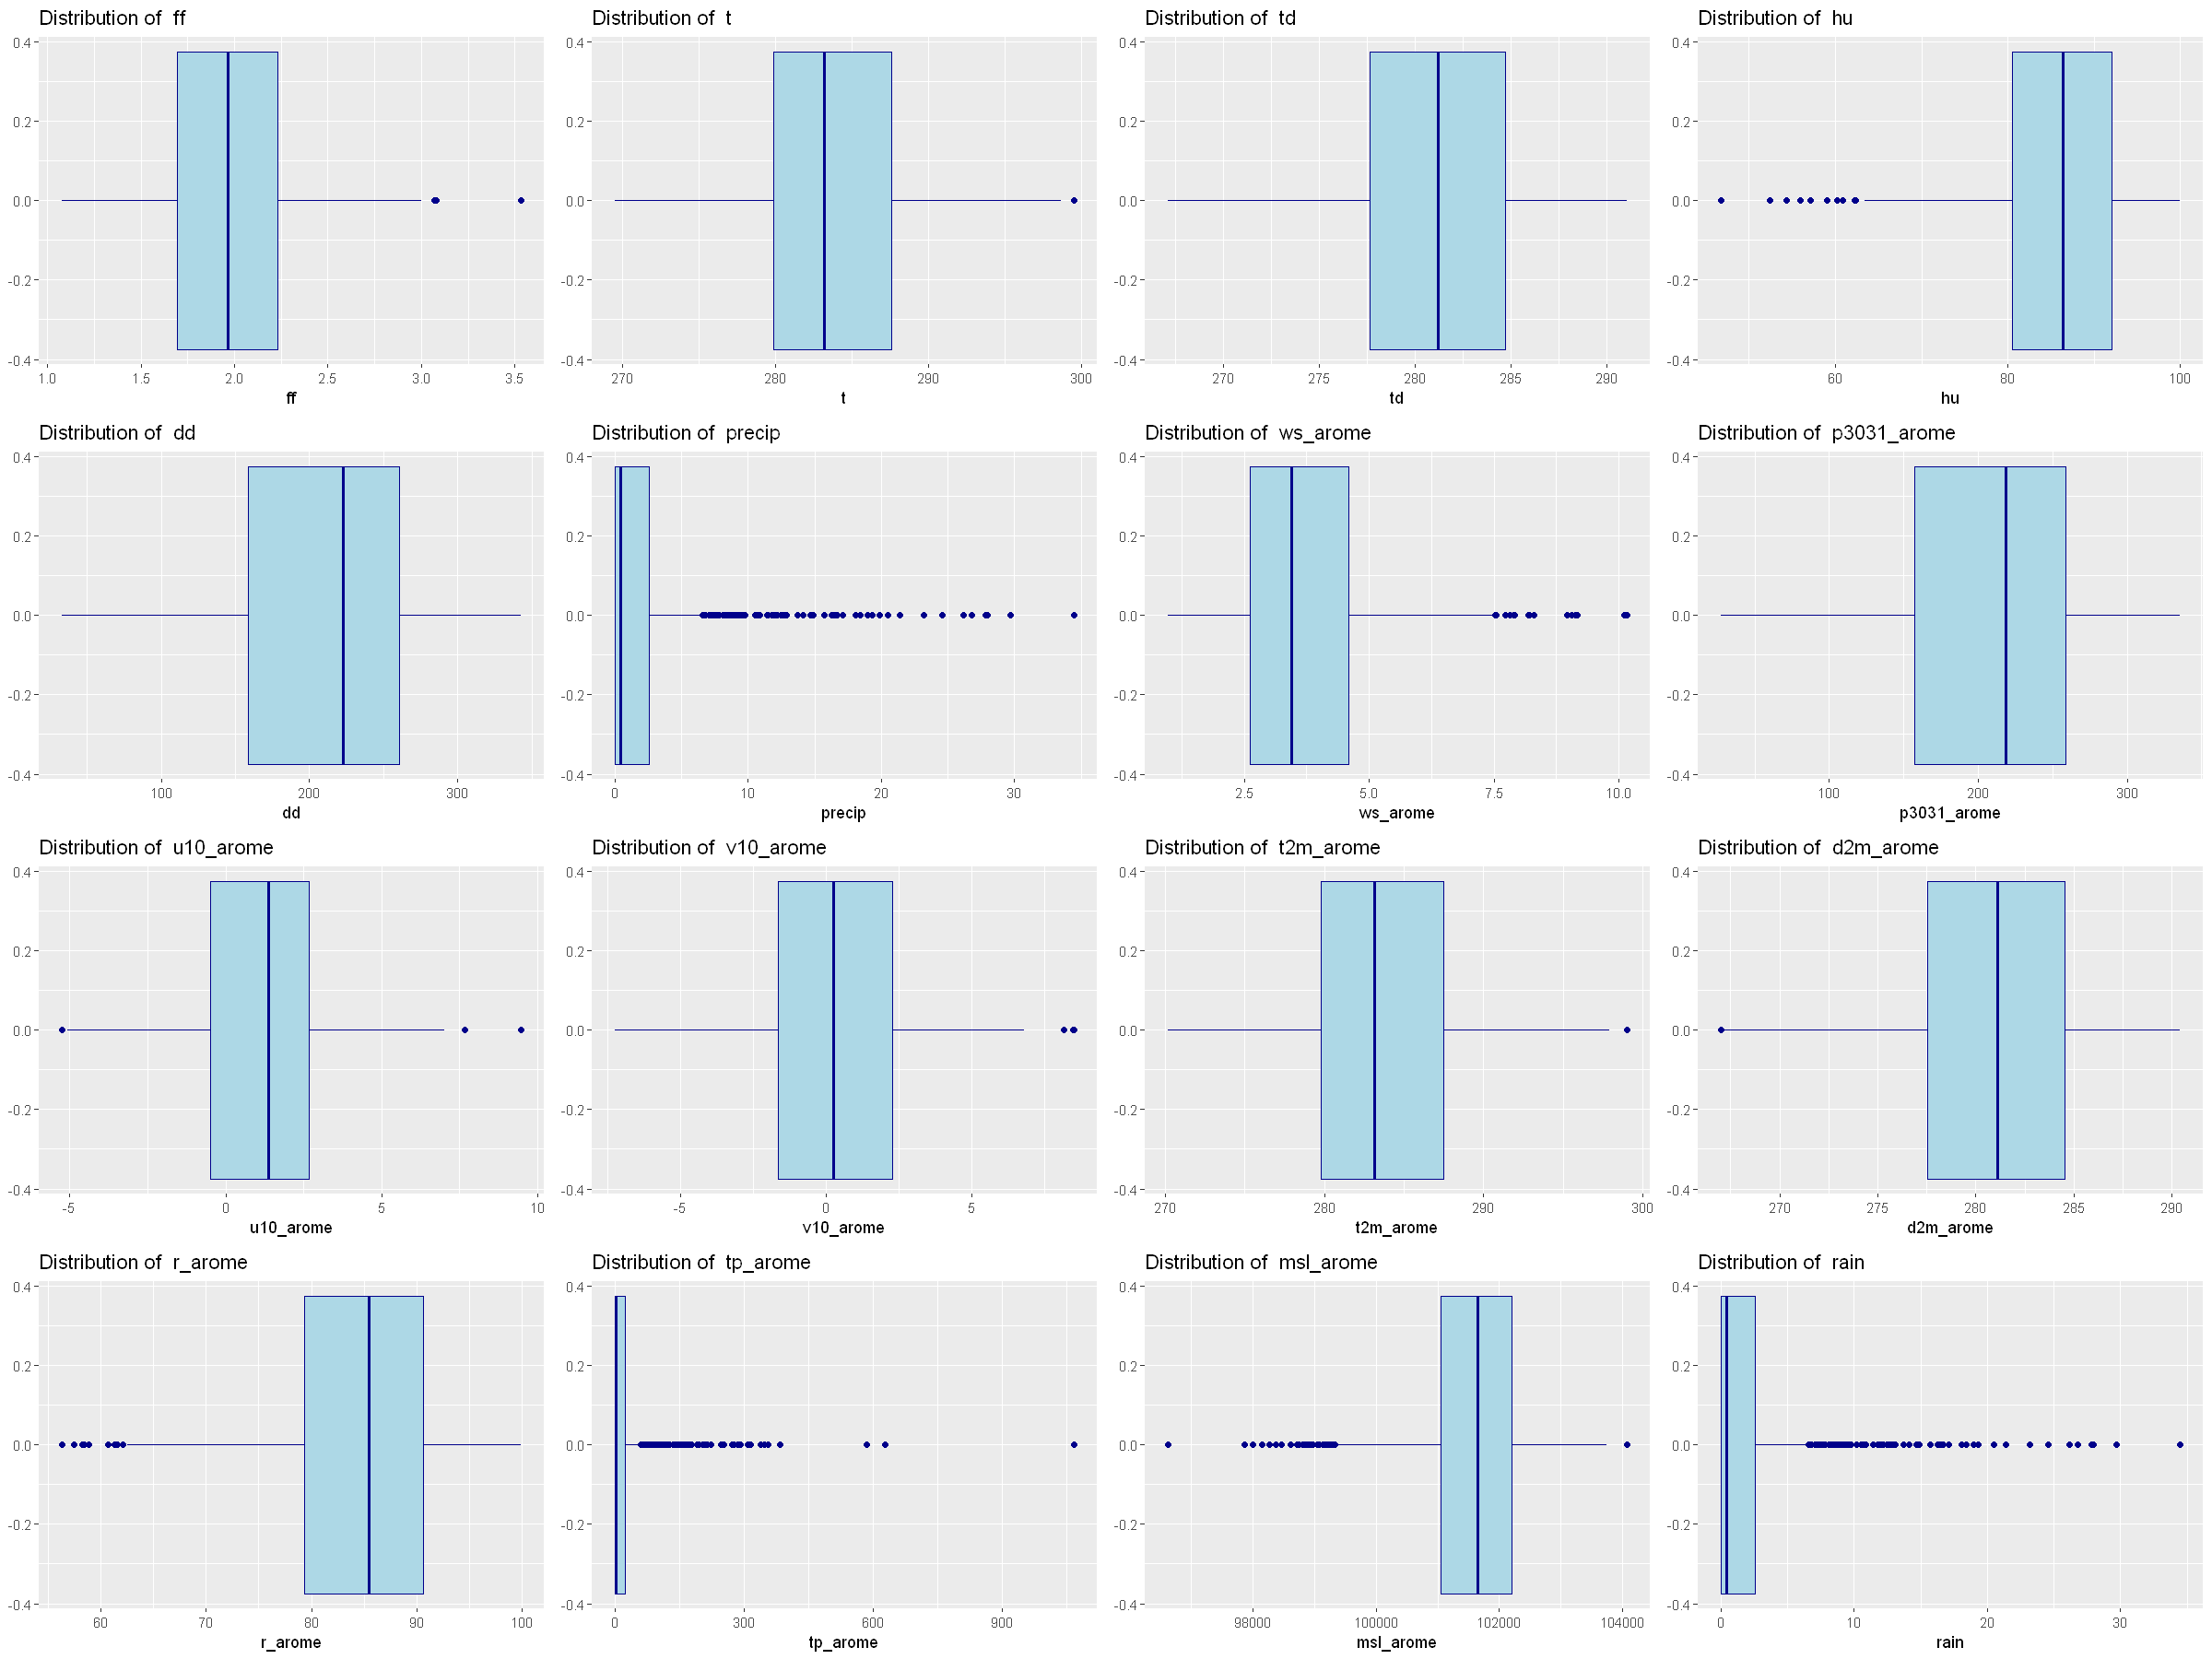

In [15]:
box_list <- lapply(num_var, function(each_variable) {
  mean_val = mean(rain[, each_variable])[[1]]
  ggplot(data = rain, aes_string(x = each_variable)) + # Create a graphic object by ggplot  
    geom_boxplot(color = "darkblue", fill="lightblue") +
    ggtitle(paste("Distribution of ",each_variable))
})

options(repr.plot.width = 20, repr.plot.height = 15)
gridExtra::grid.arrange(grobs = box_list, ncol = 4)

# Machine Learning model for prediction

### Proposed outline

1. Regression
    Linear, logistic, Lasso and Rigde, ...

2. SVM  
    SVM, Kernel trick, ...

3. Decision tree, random forest

4. Neural Network

## 1. Linear Regression